In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.tree import export_graphviz

In [5]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pydotplus

In [26]:
#вывод первых строчек данных
df = pd.read_excel('dataset_credit.xlsx')
df.head()

,ID,salary,gender,age,credit
0,0,76678,m,37,1
1,1,37034,f,32,1
2,2,16193,m,29,0
3,3,29286,f,36,1
4,4,29470,f,41,1


In [27]:
#приводим gender к числовому виду (1-f, 0-m)
df['gender'] = df['gender'].factorize()[0]
df.head()

,ID,salary,gender,age,credit
0,0,76678,0,37,1
1,1,37034,1,32,1
2,2,16193,0,29,0
3,3,29286,1,36,1
4,4,29470,1,41,1


In [28]:
#формируем матрицу признаков и результирующий столбец
x = df.drop('credit', axis = 1)
y = df['credit']

In [29]:
#разбиваем наш dataset на обучающую(80%) и тестовую(20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#создаем дерево решений(классификатор)
tree = DecisionTreeClassifier(max_depth = 4)

#обучаем его
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
prediction = tree.predict(x_test)

In [40]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
from sklearn.datasets import load_iris

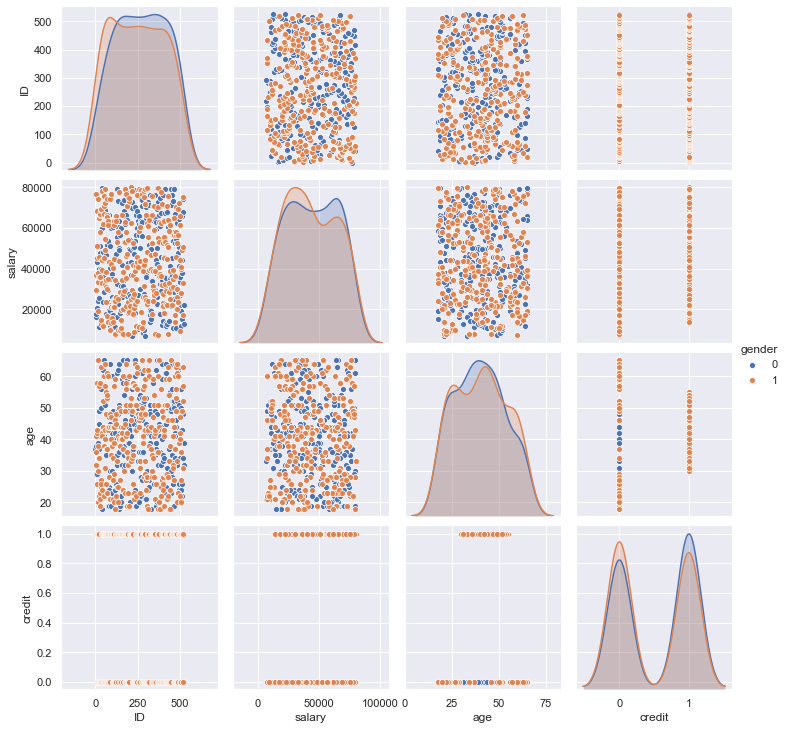

In [42]:
sns.pairplot(df, hue="gender")

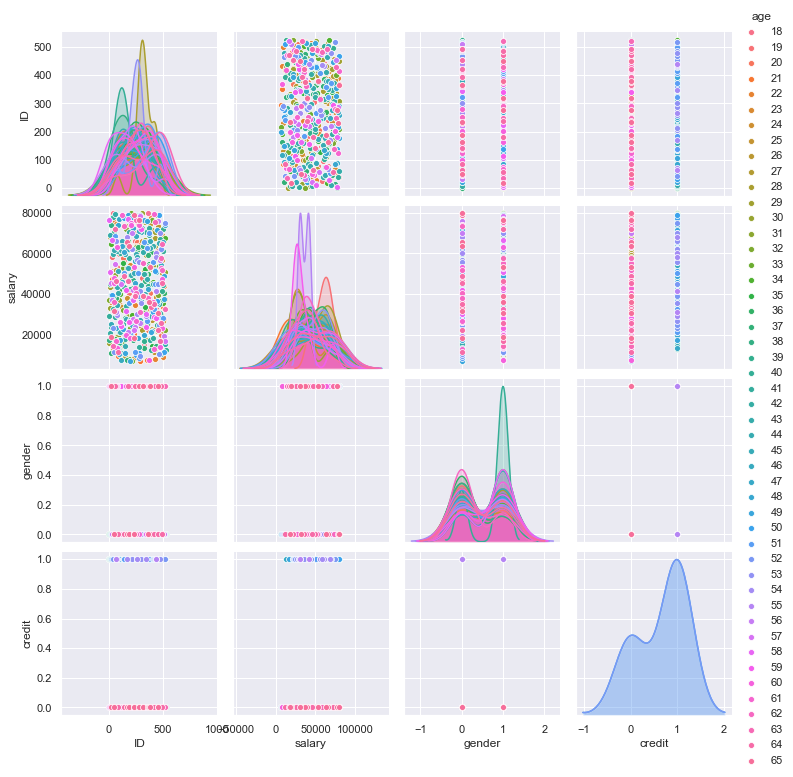

In [38]:
sns.pairplot(df, hue="age")

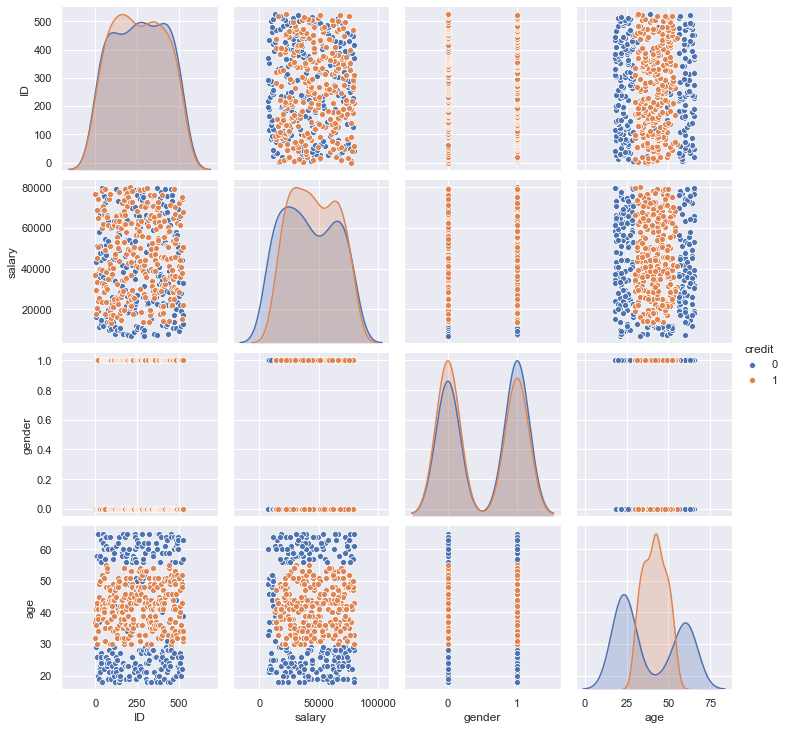

In [43]:
sns.pairplot(df, hue="credit")

In [31]:
#проверяем как работает (доля правильных ответов)
tree.score(x_test, y_test)

0.9905660377358491

In [32]:
tree.score(x_train, y_train)

1.0

In [16]:
#переводим дерево в формат dot
export_graphviz(tree, out_file = 'treecredit.dot', feature_names = x.columns, filled = True)

In [1]:
! dot -Tpng treecredit.dot -o treecredit.png

In [99]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [100]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\piedr\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |           py38_0         2.9 MB
    graphviz-2.38              |       hfa6e2cd_3        29.1 MB
    ------------------------------------------------------------
                                           Total:        32.0 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-32::graphviz-2.38-hfa6e2cd_3

The following packages will be UPDATED:

  conda                                        4.8.3-py38_0 --> 4.8.5-py38_0




graphviz-2.38        | 29.1 MB   |            |   0% 
graphviz-2.38        | 29.1 MB   |            |   0% 
graphviz-2.38        | 29.1 MB   | 6          |   6% 
graphviz-2.38        | 29.1 MB   | #2         

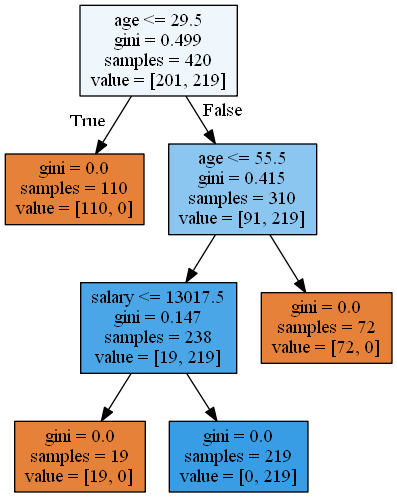

In [2]:
from PIL import Image
Image.open('treecredit.png')